# Introduction

Cereal is a staple of many peoples' breakfast, and is generally considered to be a healthy choice for kids and adults alike. But is that really the case? Cereal may seem healthy, but it's also processed, at times with large amounts of sugar. This begs the question of if cereal really is a healthy option for breakfast, as well as which types of cereal are the most nutritious. Using data science, we can analyze a dataset of cereals and their nutrition data to see which of them are truly healthy.

In this tutorial, we are going to clean and organize our data, before using it to figure out which cereals are the most and least nutritious, how nutritious cereal tends to be on average, which companies tend to have the best track record with cereal, and which factors have a positive and negative effect on how nutritious cereal is. Our ultimate goal will be to figure out what factors would lead to the most ideally nutritious cereal.

You should start by importing all of the libraries you'll need for analyzing data:

- [pandas](https://pandas.pydata.org/): Used for creating dataframes
- [numpy](https://numpy.org/): Used for creating arrays, but we usually use it for dealing with missing data
- [matplotlib](https://matplotlib.org/): Used for plotting graphs of our data
- [seaborn](https://seaborn.pydata.org/): Similarly to matplotlib, seaborn is used for graphing

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Next, you need to find a dataset. It's important that your dataset isn't too bad, since it could cause Jupyter to crash. Ideally, your dataset should have no more than 1,000,000 rows. Thankfully, I found a fairly small dataset outlining the nutritional data of a little under 80 cereals, so I won't need to modify it. The dataset can be found [here](https://www.kaggle.com/datasets/crawford/80-cereals).

# Data Collection

The first phase is going to be the Data Collection phase, which is simply about importing our data and converting it into a dataframe.

Now that we imported the dataset onto our Jupyter notebook, we can easily convert it to a dataframe using <em>.read_csv()</em>. Once you do, you can display the first five rows of your dataset using <em>.head()</em>.

- pd.read_csv(file): Reads a separated file and turns it into a dataframe.
- dataframe.head(): Displays the first five rows of your dataset.

In [2]:
cereals = pd.read_csv("cereal.csv", sep=',')
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


With just two lines, we already have our dataframe. The Cereals dataset contains 16 columns, which I'll quickly outline before we start playing around with the data:

- name: The name of the cereal
- mfr: The manufacturer of the cereal 
    - A: American Home Food Products
    - G: General Mills
    - K: Kelloggs
    - N: Nabisco
    - P: Post
    - Q: Quaker Oats
    - R: Ralston Purina
- type: Cold vs Hot
- calories: Amount of calories per serving
- protein: Grams of protein per serving
- fat: Grams of fat per serving
- sodium: Milligrams of sodium per serving
- fiber: Grams of dietary fiber per serving
- carbo: Grams of complex carbohydrates per serving
- sugars: Grams of sugars per serving
- potass: Milligrams of potassium per serving
- vitamins: Rough percentage of vitamins and minerals (0%, 25%, 100%)
- shelf: Which display shelf the cereal was on when the dataset was being recorded
- weight: Weight of a serving in ounces
- cups: Serving size in terms of cups
- rating: Nutrition rating of each of the cereals

# Data Management

Now that we have our data, we're going to need to modify the dataframe to make sure that we have all of the information we need to start our analysis. This is the Data Management phase, which focuses around reformating our data to present it in a neat way.

First, we need to make sure that all of our missing data is either denoted by NaN or null. Those are "missing data values" which don't interfere with data analysis.

If the person who made this dataset uses something like an integer or string to denote missing data, it could interfere with and mess up our attempts at analyzing our data. Let's take a look at <em>cereals.head()</em> again.

In [3]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


If you take a look at the potassium column, you'll notice that Almond Delight has a -1 grams of potassium. Obviously that's not possible, which means this indicates that -1 is used to indicate any missing data.

Now, we can replace all of the instances of -1 with a missing data value like NaN or null.

- dataframe.replace(original, replacement): Replaces every instance of a specific value with another value of your choice.

In [4]:
cereals.replace(-1, np.NaN, inplace=True, regex=True)
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


As you can see, the -1 in the Almond Delight row has now been replaced with NaN.

Next, we should try to figure out what columns we probably aren't going to need, since 16 different columns can be pretty unweildy to deal with. We can delete the ones we don't need, and create new columns if we feel that certain data should be presented in a different manner. Let's start with the columns that we should probably delete. 

The <em>shelf</em> column is the most obvious instance of this, since the arbitrary placement of cereal on a shelf doesn't have anything to do with how healthy it is. 

In addition, we can probably remove the <em>type</em> column since there are only three hot cereals out of 77, which just isn't enough to determine if it has any noticeable impact on how nutritious cereal is compared to cold cereal. Similarly, I also wanted to remove <em>weight</em>, since the majority of the cereal have the same exact weight meaning the category won't be all that helpful.

Finally, I'm going to remove the <em>vitamins</em> column since it's a bit confusing in what it's trying to say, and either way we won't be using it for our analysis.

- dataframe.drop(column_names): Deletes a column or list of columns from the dataframe.

In [5]:
cereals.drop(['shelf','type', 'weight', 'vitamins'], axis=1, inplace=True)
cereals.head()

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,cups,rating
0,100% Bran,N,70,4,1,130,10.0,5.0,6.0,280.0,0.33,68.402973
1,100% Natural Bran,Q,120,3,5,15,2.0,8.0,8.0,135.0,1.00,33.983679
2,All-Bran,K,70,4,1,260,9.0,7.0,5.0,320.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,50,4,0,140,14.0,8.0,0.0,330.0,0.50,93.704912
4,Almond Delight,R,110,2,2,200,1.0,14.0,8.0,NaN,0.75,34.384843


In addition, it's probably also helpful to standardize all of the measurements in case you need to do any calculations. Sodium and potassium are the only nutrient columns in milligrams, so let's convert that to grams.

- dataframe[column_name].div(number): Divide every entry in a column by a number

In [6]:
cereals['sodium'] = cereals['sodium'].div(1000)
cereals['potass'] = cereals['potass'].div(1000)
cereals.head()

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,cups,rating
0,100% Bran,N,70,4,1,0.130,10.0,5.0,6.0,0.280,0.33,68.402973
1,100% Natural Bran,Q,120,3,5,0.015,2.0,8.0,8.0,0.135,1.00,33.983679
2,All-Bran,K,70,4,1,0.260,9.0,7.0,5.0,0.320,0.33,59.425505
3,All-Bran with Extra Fiber,K,50,4,0,0.140,14.0,8.0,0.0,0.330,0.50,93.704912
4,Almond Delight,R,110,2,2,0.200,1.0,14.0,8.0,NaN,0.75,34.384843


While looking at the nutrients (the <em>protein</em> through <em>potass</em> columns) individually can be helpful, it may also be helpful to generalize them as "healthy" or "unhealthy" nutrients. I used the [FDA website](https://www.fda.gov/food/new-nutrition-facts-label/how-understand-and-use-nutrition-facts-label) to help me figure out how to categorize the nutrients.

Healthy: Protein, Fiber, Carbohydrates, Potassium <br>
Unhealthy: Fat, Sodium, Sugars

That's why we converted the sodium and potassium columns into grams, so we can add the healthy and unhealthy nutrient columns together. As you can see in the code below, creating a new column doesn't normally require any new bits of code. However, with the NaN elements in our table, we need to use .fillna() so that NaN functions as 0 when doing addition.

- dataframe.fillna(replacement): Fills NaN values with replacement

In [7]:
cereals['pos_nutr'] = cereals.fillna(0)['protein'] + cereals.fillna(0)['fiber'] + cereals.fillna(0)['carbo'] + cereals.fillna(0)['potass']
cereals['neg_nutr'] = cereals.fillna(0)['fat'] + cereals.fillna(0)['sodium'] + cereals.fillna(0)['sugars']
cereals.head()

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,cups,rating,pos_nutr,neg_nutr
0,100% Bran,N,70,4,1,0.130,10.0,5.0,6.0,0.280,0.33,68.402973,19.280,7.130
1,100% Natural Bran,Q,120,3,5,0.015,2.0,8.0,8.0,0.135,1.00,33.983679,13.135,13.015
2,All-Bran,K,70,4,1,0.260,9.0,7.0,5.0,0.320,0.33,59.425505,20.320,6.260
3,All-Bran with Extra Fiber,K,50,4,0,0.140,14.0,8.0,0.0,0.330,0.50,93.704912,26.330,0.140
4,Almond Delight,R,110,2,2,0.200,1.0,14.0,8.0,NaN,0.75,34.384843,17.000,10.200


You may notice that our positive and negative nutrient columns are at the end of the table, which isn't ideal. So finally, before we actually start our analysis, let's sort the table a bit so that it's easier to read.

Sorting columns is also pretty simple, not requiring any new terms we don't already know.

In [8]:
cereals = cereals[['name', 'mfr', 'cups', 'calories', 'protein', 'fiber', 'carbo', 'potass', 'pos_nutr', 'fat', 'sodium', 'sugars', 'neg_nutr', 'rating']]
cereals.head()

,name,mfr,cups,calories,protein,fiber,carbo,potass,pos_nutr,fat,sodium,sugars,neg_nutr,rating
0,100% Bran,N,0.33,70,4,10.0,5.0,0.280,19.280,1,0.130,6.0,7.130,68.402973
1,100% Natural Bran,Q,1.00,120,3,2.0,8.0,0.135,13.135,5,0.015,8.0,13.015,33.983679
2,All-Bran,K,0.33,70,4,9.0,7.0,0.320,20.320,1,0.260,5.0,6.260,59.425505
3,All-Bran with Extra Fiber,K,0.50,50,4,14.0,8.0,0.330,26.330,0,0.140,0.0,0.140,93.704912
4,Almond Delight,R,0.75,110,2,1.0,14.0,NaN,17.000,2,0.200,8.0,10.200,34.384843


# Exploratory Data Analysis

In the introduction, I brought up some of the questions that we want to answer using data analysis:

- Which cereals are the most and least nutritious?
- How nutritious is cereal on average?
- Which companies have the best track record with cereal?

In the Exploratory Data Analysis phase, we finally start trying to answer these questions using our dataset. More specifically, this is where we start to plot our data.

Let's start with the first two since those are the simplest to figure out. You can figure out which cereals are the most and least nutritious by finding the minimum and maximum nutrition rating. For starters, you can get the max and min nutrition ratings by using <em>.max()</em> and <em>.min()</em>.

- dataframe.max(): Gets the maximum value in a column, or even the entire dataframe if necessary
- dataframe.max(): Gets the minimum value in a column, or even the entire dataframe if necessary

In [9]:
print(cereals['rating'].max())

93.704912


In [10]:
print(cereals['rating'].min())

18.042851


While we now know the maximum and minimum nutrition ratings, we don't know which cereals they correspond to. So let's instead sort the dataframe by nutrition rating, ascending and descending, to get the full picture.

- dataframe.sort_values(by=column, ascending=True/False): Sorts a dataframe by a column, either ascending or descending. You can even use it to sort by multiple columns.

In [11]:
max_nutrition = cereals.sort_values(by=['rating'], ascending=False)
max_nutrition.head()

,name,mfr,cups,calories,protein,fiber,carbo,potass,pos_nutr,fat,sodium,sugars,neg_nutr,rating
3,All-Bran with Extra Fiber,K,0.50,50,4,14.0,8.0,0.330,26.330,0,0.14,0.0,0.14,93.704912
64,Shredded Wheat 'n'Bran,N,0.67,90,3,4.0,19.0,0.140,26.140,0,0.00,0.0,0.00,74.472949
65,Shredded Wheat spoon size,N,0.67,90,3,3.0,20.0,0.120,26.120,0,0.00,0.0,0.00,72.801787
0,100% Bran,N,0.33,70,4,10.0,5.0,0.280,19.280,1,0.13,6.0,7.13,68.402973
63,Shredded Wheat,N,1.00,80,2,3.0,16.0,0.095,21.095,0,0.00,0.0,0.00,68.235885


In [12]:
min_nutrition = cereals.sort_values(by=['rating'], ascending=True)
min_nutrition.head()

,name,mfr,cups,calories,protein,fiber,carbo,potass,pos_nutr,fat,sodium,sugars,neg_nutr,rating
10,Cap'n'Crunch,Q,0.75,120,1,0.0,12.0,0.035,13.035,2,0.22,12.0,14.22,18.042851
12,Cinnamon Toast Crunch,G,0.75,120,1,0.0,13.0,0.045,14.045,3,0.21,9.0,12.21,19.823573
35,Honey Graham Ohs,Q,1.00,120,1,1.0,12.0,0.045,14.045,2,0.22,11.0,13.22,21.871292
18,Count Chocula,G,1.00,110,1,0.0,12.0,0.065,13.065,1,0.18,13.0,14.18,22.396513
14,Cocoa Puffs,G,1.00,110,1,0.0,12.0,0.055,13.055,1,0.18,13.0,14.18,22.736446


Here we are, now we know that the healthiest cereal seems to be All-Bran With Extra Fiber, and the least healthiest cereal seems to be Cap'n'Crunch. 

You can also tell that the healthier cereals seem to have low amounts of calories, large amounts of the positive nutrients, and low amounts of the negative nutrients. Similarly, the unhealthy cereals have lots of calories, large amounts of negative nutrients (especially sugars), and not as many positive nutrients.

Next, let's try to figure out what the average nutritional rating is. This can be easily calculated using <em>.mean()</em>.

- dataframe.mean(): Calculates the average of the elements of a dataframe or its columns.

In [13]:
print(cereals['rating'].mean())

42.66570498701299


That's not a very good sign. If the best nutritional rating in the dataset is a 93 and the worst is an 18, this average seems to indicate that the nutritional ratings are skewed towards the unhealthy side. But let's try to prove that using a graph.

To figure out the distribution of nutritional ratings, the ideal type of graph would probably be a violin plot, which shows off both the mean and full distribution of a dataset. We'd just need a simple horizontal violin plot for our purposes right now, so let's make one using seaborn.

- seaborn.set_theme: Set the theme of your graph
- seaborn.violinplot(axes): Makes a violin plot

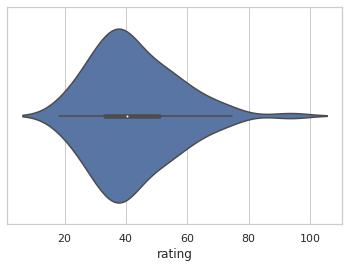

In [37]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=cereals["rating"])

This violin plot pretty much confirms it, the majority of the cereal in our dataset has nutritional ratings under 50, which is pretty concerning.

Next, let's try to figure out which manufacturers tend to have the healthiest cereals, and which ones don't. Let's start simple by only getting the averages of the nutritional ratings of each manufacturer's cereals. We can do this by reusing <em>.mean()</em> but adding a condition to check if the rating is from a certain manufacturer.

- dataframe.loc[]: Access a group of rows or columns based on a condition

In [15]:
print("American Home Food Products:") 
print(cereals['rating'].loc[cereals['mfr'] == 'A'].mean())

American Home Food Products:
54.850917


In [16]:
print("General Mills:") 
print(cereals['rating'].loc[cereals['mfr'] == 'G'].mean())

General Mills:
34.48585168181818


In [17]:
print("Kelloggs:") 
print(cereals['rating'].loc[cereals['mfr'] == 'K'].mean())

Kelloggs:
44.03846234782609


In [18]:
print("Nabisco:") 
print(cereals['rating'].loc[cereals['mfr'] == 'N'].mean())

Nabisco:
67.96856716666666


In [19]:
print("Post:") 
print(cereals['rating'].loc[cereals['mfr'] == 'P'].mean())

Post:
41.70574411111111


In [20]:
print("Quaker Oats:") 
print(cereals['rating'].loc[cereals['mfr'] == 'Q'].mean())

Quaker Oats:
42.915989875


In [21]:
print("Ralston Purina:") 
print(cereals['rating'].loc[cereals['mfr'] == 'R'].mean())

Ralston Purina:
41.542997125


Looking at these averages, you can see that the manufacturer with the healthiest cereals seems to be Nabisco, with American Home Food Products in a distant second. On the other hand, General Mills seems to have the least healthy cereals, and many of the manufacturers seem to hover somewhere around the average nutritional rating.

But we can get more information than that! Now let's try to make seven violin plots, one for each manufacturer, to get their full spread like we did with the overall average. Instead of using seaborn, let's try to make this violin plot using matplotlib. It's probably going to be our most complicated code to date, but it's worth learning so that you can graph any plot you'd like using matplotlib.

The first code you usually write when making a matplotlib graph is <em>fig, ax = plt.subplots()</em>. This creates a figure for your graph and a set of subplots. After this, you can essentially create any type of plot you want using your subplots. If you want to make a violinplot, you type in <em>ax.violinplot(axes)</em>, which works with one or two axes. You can then add in labels and titles, and save your figure as a png image.

It's also worth noting that you need lists to create a plot, so I created a list and implemented a for-loop that divides the dataframe up into seven lists separated by manufacturer and adds them to the larger list

That's a lot of new information, so here's a list of all of the code you'll need to know right now:
- plt.subplots(): Creates a figure and a set of subplots
- axes.violinplot(axes): Makes a violin plot
- axes.set_xlabel(label_name): Gives the x-axis a label
- axes.set_ylabel(label_name): Gives the y-axis a label
- axes.set_title(title_name): Gives the graph a title
- axes.set_xticks(): Sets the x-axis of the violin plot
- axes.set_yticks(): Sets the y-axis of the violin plot
- axes.set_xticklabels(label_name): Modifies the labels of the ticks on the x-axis
- axes.set_yticklabels(label_name): Modifies the labels of the ticks on the y-axis
- pyplot.savefig(figure_name): Saves the figure as an image
- list.append(): Adds an element to a list

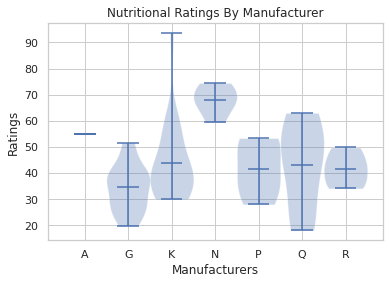

In [44]:
fig, ax = plt.subplots()

manufacturers = ['A', 'G', 'K', 'N', 'P', 'Q', 'R']
mfr_int = [0, 1, 2, 3, 4, 5, 6]

# This essentially turns the ratings list into a list of seven lists of ratings separated by manufacturer
ratings_per_mfr = []
for mfr in manufacturers:
    mfr_frame = cereals[cereals['mfr'] == mfr]
    ratings_per_mfr.append(mfr_frame['rating'])

ax.violinplot(ratings_per_mfr,mfr_int,widths=1,showmeans=True,vert=True)
ax.set_xlabel("Manufacturers")
ax.set_ylabel("Ratings")
ax.set_title("Nutritional Ratings By Manufacturer")
ax.set_xticks(mfr_int)
ax.set_xticklabels(manufacturers)
fig.savefig("violin2.png")

This reveals a few interesting discoveries that you couldn't tell from just the averages. For starters, it seems there is only one cereal from American Home Food Products on the datable, meaning its high average isn't an indication of how good its food is. On the other hand, Nabisco has plenty of cereals on the dataset and managed to consistently get great nutritional ratings. 

In addition, and probably most strikingly of all, Kelloggs seemed to have a single cereal (All-Bran With Extra Fiber) with a super high nutritional rating, but otherwise performed pretty average.

Through this data analysis, we've figured out that cereals tend to be unhealthy a lot of the time, unless Nabisco is making them. We've also noticed that the amount of calories and types of nutrients in the cereal seemed to have an impact on the nutrition rating, but what would that impact be? And how can we use that information to predict what would lead to the ideal cereal?

# Hypothesis Testing

Let's compare the nutritional rating with some different factors on the dataset and see how they affect it. I think it's worth comparing the nutritional rating with:
- Calories
- Cups
- Positive Nutrients
- Negative Nutrients

We can start with calories. Since this time, we'll be comparing two numbered columns, I think scatterplots will be useful this time around. While we can make a scatterplot with matplotlib, an even easier method would just simply be to use pandas for it.

However, it's also helpful that we add in a linear regression line. These are models that can not only concretely show us the trend of each of the scatterplots, but they can also serve as a method to predict what the nutritional rating would be outside the scope of our figures.

Making a linear regression line is slightly more complicated than just a scatterplot on its own, using a combination of numpy and matplotlib.

- dataframe.plot.scatter(): Creates a scatter plot of two columns of your dataframe.
- numpy.array(): Turns a column into an array
- numpy.polyfit(): Returns a slope and y-intercept for a potential linear regression line based on your plot
- matplotlib.plot(): Simply plots a line

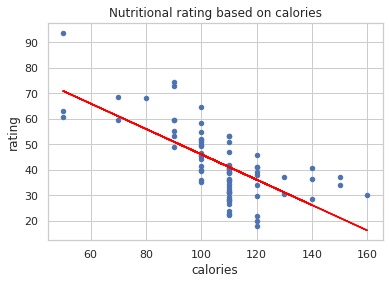

In [55]:
cereals.plot.scatter(x='calories', y='rating', title="Nutritional rating based on calories", c="b")

x = np.array(cereals['calories'])
y = np.array(cereals['rating'])

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")

As you can see with this scatterplot, the nutritional rating tends to decrease as calories increase. This falls in line with our observation earlier on in the analysis and suggests that cereal is healthier if it has less calories.

Now let's do the same thing but with the cups column. The only thing we're really changing going to be the columns we make the scatterplot with.

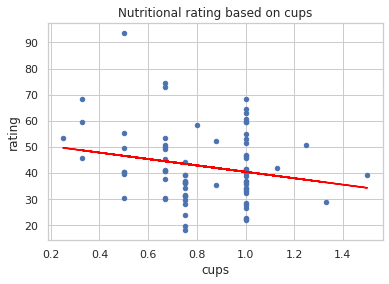

In [56]:
cereals.plot.scatter(x='cups', y='rating', title="Nutritional rating based on cups", c="b")

x = np.array(cereals['cups'])
y = np.array(cereals['rating'])

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")

While the linear regression line looks like it skews downward, I actually think it might be affected by the 93 nutrition rating outlier, which happens to have a serving size of 0.5 cups. Outside of that, I really don't think the serving size in terms of cups makes much of a difference in how healthy cereal is, especially compared to the scatter plot for calories.

Now let's try with the positive and negative nutrients instead.

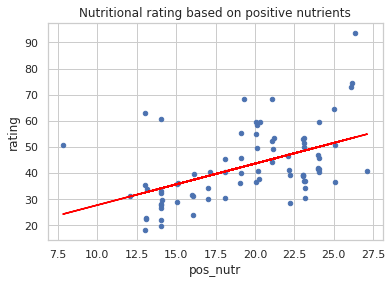

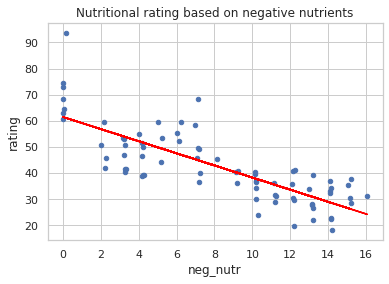

In [57]:
cereals.plot.scatter(x='pos_nutr', y='rating', title="Nutritional rating based on positive nutrients", c="b")

x = np.array(cereals['pos_nutr'])
y = np.array(cereals['rating'])

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")

cereals.plot.scatter(x='neg_nutr', y='rating', title="Nutritional rating based on negative nutrients", c="b")

x = np.array(cereals['neg_nutr'])
y = np.array(cereals['rating'])

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")

And it's just as we observed at the start of the analysis. Healthy nutrients such as fiber and carbohydrates seem to have a positive impact on the nutrition rating of cereal, and unhealthy nutrients like fat and sugars seem to have a negative impact on the nutrition rating of cereal.

But let's look a bit deeper. Let's try to figure out which of each type of nutrient has the biggest impacts on the nutrition rating. We'll simply make scatter plots for each of the individual nutrients to see which ones look like they have a greater impact on how healthy or unhealthy a cereal is.

However, you need to remember that these nutrient charts have NaN values, and you can't make a linear regression line using NaN values. As a result, you have to use <em>.isfinite()</em> to make sure you only make the linear regression line with finite values.

- numpy.isfinite(array): Tests each element in an array to see if it's finite.

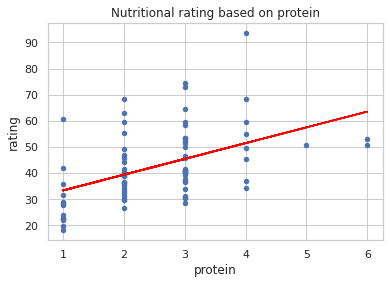

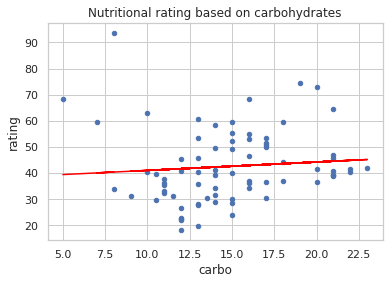

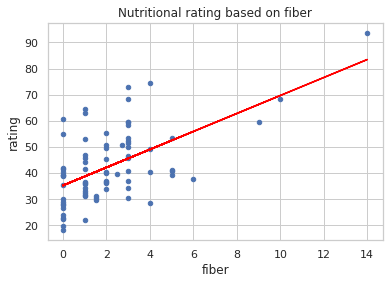

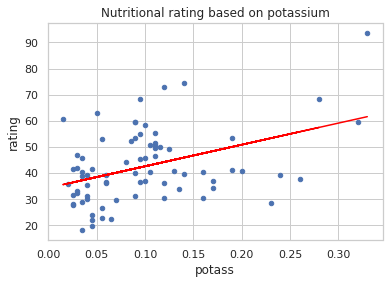

In [70]:
cereals.plot.scatter(x='protein', y='rating', title="Nutritional rating based on protein", c="b")

x = np.array(cereals['protein'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
plt.plot(x, m*x + b, color="red")

cereals.plot.scatter(x='carbo', y='rating', title="Nutritional rating based on carbohydrates", c="b")

x = np.array(cereals['carbo'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
plt.plot(x, m*x + b, color="red")

cereals.plot.scatter(x='fiber', y='rating', title="Nutritional rating based on fiber", c="b")

x = np.array(cereals['fiber'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
plt.plot(x, m*x + b, color="red")

cereals.plot.scatter(x='potass', y='rating', title="Nutritional rating based on potassium", c="b")

x = np.array(cereals['potass'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
plt.plot(x, m*x + b, color="red")

Looking at these scatterplots, it seems that potassium and fiber seem to have the largest and most noticeable impact. While the majority of cereal seem to have pretty low amounts of both, whenever there is a large amount of fiber and/or potassium, it usually leads to a higher than average nutrition rating. In particular, that 93 nutrition rating has the highest amounts of both fiber and potassium. 

However, these linear regression lines seem to have the steepest slopes for fiber and protein. The least steep slope is for carbohydrates, so it's fair to assume that it doesn't make as much of an impact as the other positive nutrients.

Now, let's do the same thing but for the negative nutrients.

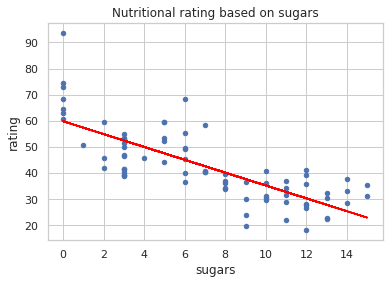

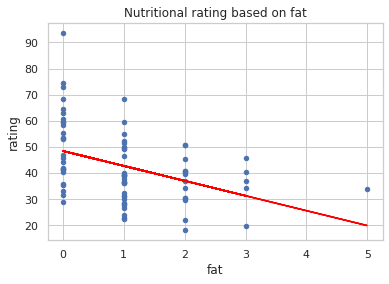

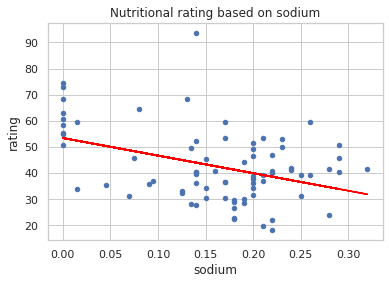

In [72]:
cereals.plot.scatter(x='sugars', y='rating', title="Nutritional rating based on sugars", c="b")

x = np.array(cereals['sugars'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
plt.plot(x, m*x + b, color="red")

cereals.plot.scatter(x='fat', y='rating', title="Nutritional rating based on fat", c="b")

x = np.array(cereals['fat'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
plt.plot(x, m*x + b, color="red")

cereals.plot.scatter(x='sodium', y='rating', title="Nutritional rating based on sodium", c="b")

x = np.array(cereals['sodium'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
plt.plot(x, m*x + b, color="red")

These scatter plots seem to suggest that sugars have the highest impact on how unhealthy food is, it looks there's an incredibly dramatic decrease in nutrition rating as sugars increase. Fat doesn't have as noticeable of a drop, but it is worth pointing out that the cereal with the highest nutrition is when fat is at a minimum. Finally, sodium's plot doesn't look as flat as the one for carbohydrates, but it probably makes the least impact out of the three.

Now that we know how each individual factor has an impact on the nutrition rating, let's try to figure out the best possible nutrition rating we can get.

Let's start by taking the linear regression line we found for calories and extend it, as far as it can go. We can do this by expanding the bounds of our graph using <em>.xlim()</em> and <em>.ylim()</em>, and by turning our line segment of a linear regression line into a never-ending line using <em>.axline()</em>.

- matplotlib.xlim(): Set the bounds of the x-axis
- matplotlib.ylim(): Set the bounds of the y-axis
- axes.axline(): Generates a line

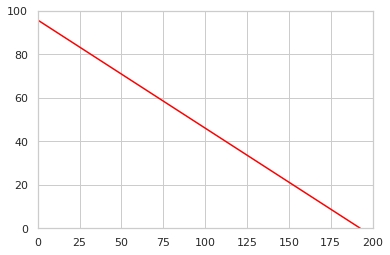

In [84]:
fig, ax = plt.subplots()
plt.xlim([0, 200])
plt.ylim([0, 100])

x = np.array(cereals['calories'])
y = np.array(cereals['rating'])

m, b = np.polyfit(x, y, 1)
ax.axline(xy1=(0, b), slope=m, color="red")

Looking at this graph, you can see that a cereal with 0 calories could have a nutritional rating of nearly 100. While I'm not entirely sure that's possible, if a cereal has less than 30 calories, it can still end up with an incredibly high nutritional rating.

Now, let's try this with all of the positive nutrients. To keep things simple, I put all of the lines in the same plot and added a legend.

- axes.legend(): Add a legend to your plot

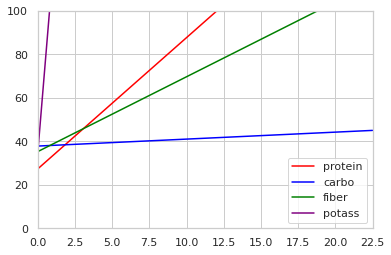

In [89]:
fig, ax = plt.subplots()
plt.xlim([0, 22.5])
plt.ylim([0, 100])

x = np.array(cereals['protein'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
l1 = ax.axline(xy1=(0, b), slope=m, color="red")

x = np.array(cereals['carbo'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
l2 = ax.axline(xy1=(0, b), slope=m, color="blue")

x = np.array(cereals['fiber'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
l3 = ax.axline(xy1=(0, b), slope=m, color="green")

x = np.array(cereals['potass'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
l4 = ax.axline(xy1=(0, b), slope=m, color="purple")
ax.legend([l1, l2, l3, l4], ['protein', 'carbo', 'fiber', 'potass'])

The first thing I noticed from this graph is the fact that carbohydrates really doesn't make much of an impact at all, especially compared to the other three. It seems that the optimal amount of protein, carbohydrates, and potassium would be around 12 grams, 18.5 grams, and 1000 milligrams respectively.

Now, let's do the negative nutrients.

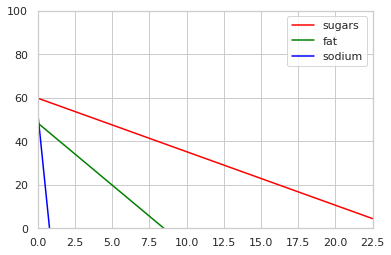

In [91]:
fig, ax = plt.subplots()
plt.xlim([0, 22.5])
plt.ylim([0, 100])

x = np.array(cereals['sugars'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
l1 = ax.axline(xy1=(0, b), slope=m, color="red")

x = np.array(cereals['fat'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
l2 = ax.axline(xy1=(0, b), slope=m, color="green")

x = np.array(cereals['sodium'])
y = np.array(cereals['rating'])

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)
l3 = ax.axline(xy1=(0, b), slope=m, color="blue")
ax.legend([l1, l2, l3], ['sugars', 'fat', 'sodium'])

This graph is a lot easier to analyze. 0 grams of sugars, fats, and sodium all seem to get the best nutritional rating, so the ideal cereal wouldn't include any of it. 

# Insights And Conclusion

So, now that we have all of this information, let's try to figure out what the ideal cereal would be. The Insights And Conclusions phase is about reporting what we've learned and drawing conclusions using inferences.

An ideal cereal would have no sugars, fats, or sodium whatsoever. It would have as little calories as possible, ideally 30 or less. It would have at least 12 grams of protein, at least 18.5 grams of carbohydrates, and at least 1000 milligrams of potassium. And we should probably have Nabisco work on it, for good measure.

Do I think this cereal would actually taste good? Who knows? But if All-Bran With Extra Fiber, with its nutrition rating of 93, is any indication, this type of ideal cereal is very much possible! We just need more of it.

Breakfast is always referred to as the healthiest and most important meal of the day, with cereal being a cornerstone of the meal. So through association, I always thought that cereal was really healthy as well. So analyzing this data made me realize it's not as healthy as many seem to claim a lot of the time, primarily due to a combination of lots of calories, little fiber, and a lot of processed sugars.

But this could only be the beginning of a much larger analysis. There are way more cereals out there than just the 80 we analyzed, and quite possibly a bunch of manufacturers that focus on and strive to produce much healthier cereals than usual. This tutorial is just a taste of how much you can learn using data science, not just about cereals but about any topic. Being able to really immerse yourself in the specifics, analyze the data on your own, and coming to your own conclusions can be a great way to educate yourself as well as uncover information to help you solve problems.